In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

In [2]:
# -----------------------------
# Load dataset (use selected features or PCA)
# -----------------------------
df = pd.read_csv('../data/heart_disease_selected_features.csv')

X = df.drop('target', axis=1)
y = df['target']

In [3]:
# -----------------------------
# Standardize features for clustering
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# -----------------------------
# K-Means Clustering
# -----------------------------
# Determine optimal K using elbow method
inertia = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

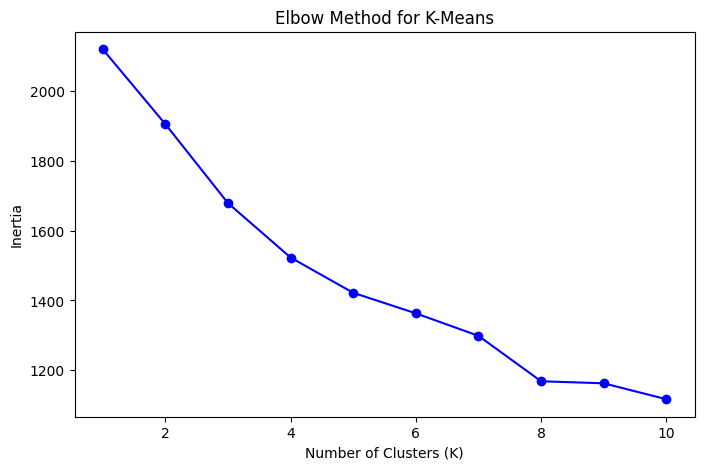

In [5]:
# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

In [6]:
# Choose K (e.g., 2 clusters for disease vs no disease)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Compare clusters with actual target using Adjusted Rand Index
ari_kmeans = adjusted_rand_score(y, clusters_kmeans)
print(f"K-Means Adjusted Rand Index: {ari_kmeans:.4f}")

K-Means Adjusted Rand Index: 0.1784


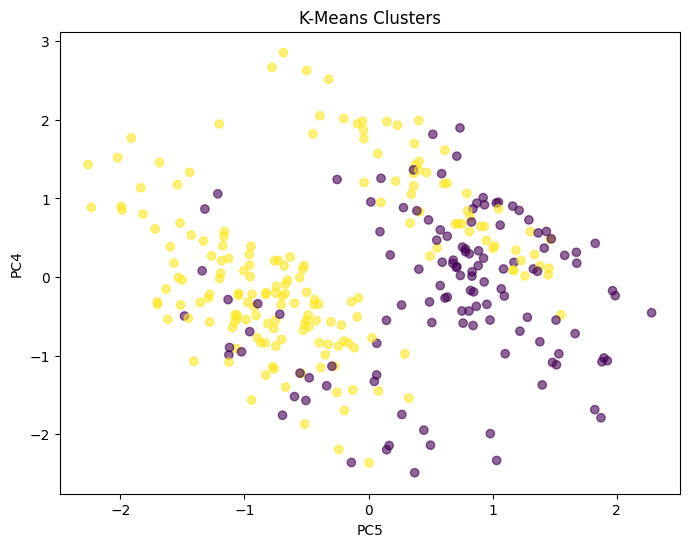

In [7]:
# Visualize K-Means clusters (using first 2 features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters_kmeans, cmap='viridis', alpha=0.6)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Means Clusters')
plt.show()

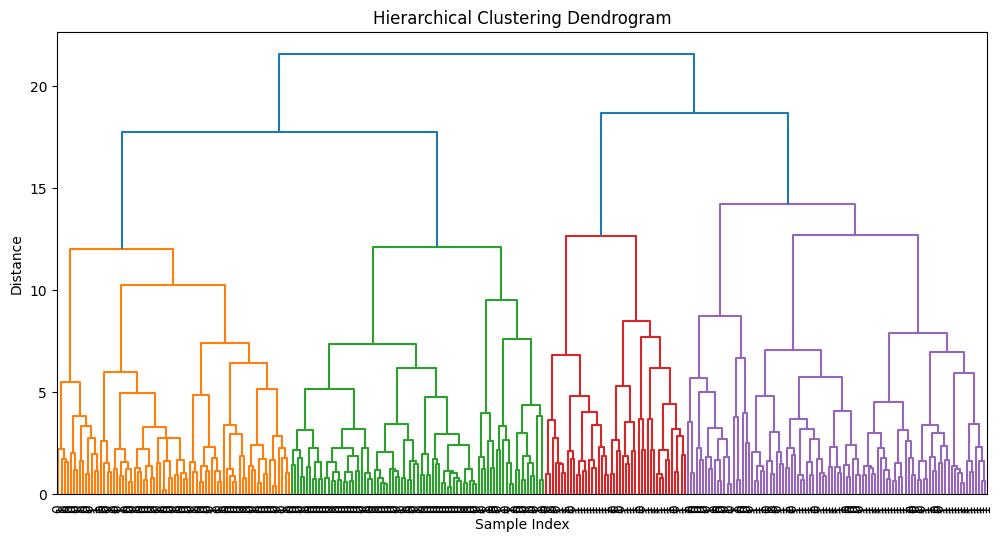

In [8]:
# -----------------------------
# Hierarchical Clustering
# -----------------------------
# Compute linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, labels=y.values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [9]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
clusters_agglo = agglo.fit_predict(X_scaled)

# Compare clusters with actual target
ari_agglo = adjusted_rand_score(y, clusters_agglo)
print(f"Hierarchical Clustering Adjusted Rand Index: {ari_agglo:.4f}")

Hierarchical Clustering Adjusted Rand Index: 0.2800
